# Solution of second-order linear ordinary differential equation

In [135]:
def write_to_file(name: str, array):
    with open(f"{name}", 'w') as file:
        for element in array:
            file.write(f"{element} ")

In [136]:
import numpy as np
import matplotlib.pyplot as plt

## Solution of $5u'' + 4u' + 1 = 0, u'(0) = u(0), u(10) = 5$

In [137]:
def u(x):
    return (9 * np.exp(8) * (x - 30) + 155 * np.exp(8 - 4 * x / 5) - 5 * (x + 1)) / (20 - 36 * np.exp(8))

## Linear element

In [138]:
def show_plot_linear(filename: str, elements: int):
    with open(filename, 'r') as file:
        data_str = file.read()

    x = np.linspace(0, 10, elements + 1)
    y = np.fromstring(data_str, sep=' ')
    y_real = u(x)

    plt.plot(x, y, label="Linear element solution", color='red')
    plt.plot(x, y_real, label="Numeral solution", color='black')
    plt.title(f"Linear element, elements = {elements}")
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.savefig(f"linear_{elements}.png", dpi=300)
    plt.show()

    write_to_file(f"linear_real_y_{elements}.txt", y_real)

## Cubic element

In [139]:
def show_plot_cubic(filename: str, elements: int):
    with open(filename, 'r') as file:
        data_str = file.read()

    x = np.linspace(0, 10, 3 * elements + 1)
    y = np.fromstring(data_str, sep=' ')
    y_real = u(x)

    plt.plot(x, y, label="Cubic element solution", color="green")
    plt.plot(x, y_real, label="Numeral solution", color='black')
    plt.title(f"Cubic element, elements = {elements} ")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"cubic_{elements}.png", dpi=300)
    plt.show()

    write_to_file(f"cubic_real_y_{elements}.txt", y_real)

## Main part

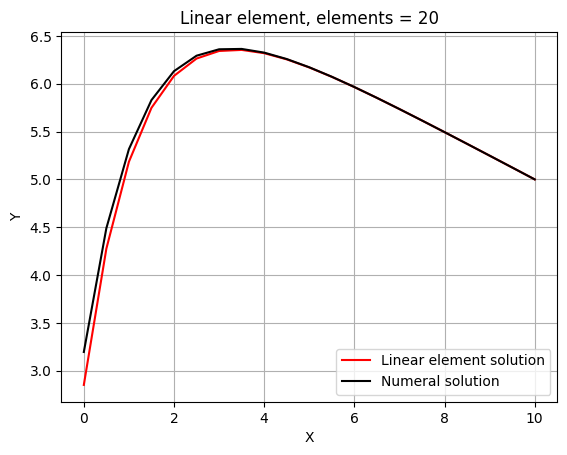

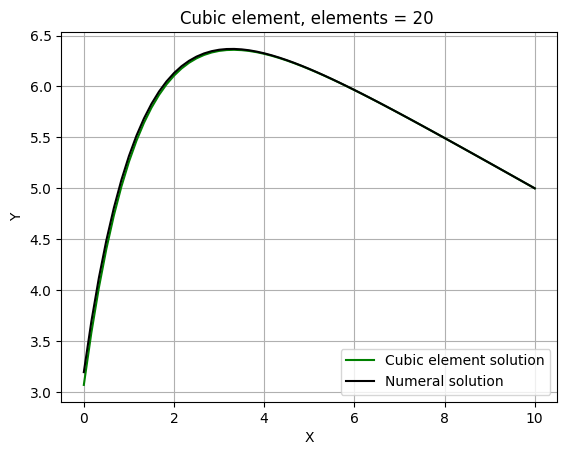

In [140]:
N = 20
show_plot_linear("matrix_linear.txt", N)
show_plot_cubic("matrix_cubic.txt", N)

## Errors

In [142]:
def read_data_from_file(filename):
    with open(filename, 'r') as file:
        content = file.read().strip()
        data = np.array([float(x) for x in content.split()])
    return data

def show_error(program_file: str, analytical_file: str):
    # Считывание данных из файлов
    real = read_data_from_file(analytical_file)
    matrix = read_data_from_file(program_file)
    
    # Расчет абсолютных разностей
    absolute_errors = np.abs(real - matrix)

    # Расчет относительных погрешностей (в долях)
    # Добавляем маленькое значение к знаменателю для избежания деления на ноль
    relative_errors = absolute_errors / (np.abs(real))

    # Расчет относительных погрешностей в процентах
    relative_errors_percent = relative_errors * 100

    # Нахождение максимальной относительной погрешности
    max_relative_error = np.max(relative_errors)
    max_relative_error_percent = np.max(relative_errors_percent)
    max_error_index = np.argmax(relative_errors)

    # Вывод результатов
    print(f"\nМаксимальная относительная погрешность: {max_relative_error:.6f} ({max_relative_error_percent:.2f}%)")
    print(f"Индекс точки с максимальной погрешностью: {max_error_index}")
    print(f"Значения в точке с максимальной погрешностью:")
    print(f"  cubic_real: {real[max_error_index]}")
    print(f"  matrix_cubic: {matrix[max_error_index]}")
    print(f"  Абсолютная разность: {absolute_errors[max_error_index]:.6f}")

In [143]:
show_error("matrix_linear.txt", "linear_real_y_20.txt")


Максимальная относительная погрешность: 0.107830 (10.78%)
Индекс точки с максимальной погрешностью: 0
Значения в точке с максимальной погрешностью:
  cubic_real: 3.1950864987612366
  matrix_cubic: 2.85056
  Абсолютная разность: 0.344526
